# DAT565 Assignment 2 – Group 43

- Student 1 - Luca Modica - (5 hours)
- Student 2 - Hugo Alves Henriques E Silva - (5 hours)
- Student 3 - YenPo Lin - (5 hours)

September 8, 2023

## Introduction

The goal of the assignment is using two different ways to analyze data and make predictions. 
- The first part will be about `Regression`, commonly used to find mathematical relationships between data features and predict numerical values (ex: continuous values).
- The second part will be about `Classification` tasks. Unlike regression, classification is used to predict between a finite number of possible categories (ex: discrete values). Based on the model used, classification can be also applied to other Machine Learning tasks: we can use for example Logistic Regression to perform feature selection, allowing us to select the most important features of a dataset to train a model.

## Importing the libraries

In addition to the Python standard packages for data handling and analysis (`numpy`, `pandas`, `matplotlib`, `seaborn`), in this assignment we will also use the `scikit-learn` package. For our assignment, `scikit-learn` provides multiple useful tools for:
- building machine learning models
- measuring machine learning models performance with specific metrics
- apply data preprocessing to datasets, like standardization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# config inline plots
%matplotlib inline

# set seaborn style
sns.set_style('darkgrid')

## Part 1: Regression

The dataset given in this task is a csv file related to housing information, including several features such as the living area and the number of rooms. We then use `Regression` to further analyze the relationships required by the questions and predict the selling price value.

### Import Datasets

In [2]:
hemnet_df = pd.read_csv('../datasets/hemnet.csv')

In [3]:
hemnet_df.head()

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000


In [4]:
hemnet_df.describe()

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
count,56.000000,56.000000,54.000000,55.000000,32.000000,56.000000,5.600000e+01
mean,28.500000,128.678571,5.296296,1125.454545,39.093750,40.767857,4.713125e+06
std,16.309506,36.006619,1.126518,656.685189,31.670032,28.079103,1.241117e+06
min,1.000000,63.000000,2.000000,218.000000,6.000000,0.000000,1.775000e+06
25%,14.750000,104.000000,5.000000,526.500000,18.250000,12.750000,4.075000e+06
50%,28.500000,133.000000,5.000000,1213.000000,30.000000,43.000000,4.812500e+06
75%,42.250000,154.250000,6.000000,1615.000000,52.500000,59.750000,5.831250e+06
max,56.000000,210.000000,7.000000,3285.000000,118.000000,96.000000,6.800000e+06


### 1. Find a linear regression model that relates the living area to the selling price. If in doing so, you performed any data cleaning step(s), describe what you did and explain why.

### Data cleaning and data selection

Before fitting our data into a Linear Regression model, we performed 2 main tasks:
- we did a specific data selection related to what the question asked. We filter the dataset by taking the `Living_area` (the independent variable) and the `Selling_price` (the dependent variable and the target of the prediction).
- After that, we check for null values to make sure that we are reading consistent data using the `isnull()` function.

In [5]:
# data selection
regression_hemnet_df = hemnet_df[['Living_area', 'Selling_price']]

In [6]:
# check for null values
regression_hemnet_df.isnull().sum()

Living_area      0
Selling_price    0
dtype: int64

### Data visualization

After doing the data selection and cleaning, we visualized the dataframe in order to have a clear inspection on it.
- **x axis**: Living_area
- **y axis**: Selling_price

For this part we defined a plot function to avoid repeating the code every time we need to do so.
- **xAxis**: Xinput
- **yAxis**: Yinput
- **title**: the title of the graph
- **xlabel**: xAxis input label
- **ylabel**: yAxis input label.

In [7]:
def make_scatter_plot(xAxis, yAxis, title, xlabel, ylabel, axis=None):
    if axis is None:
        sns.scatterplot(x=xAxis, y=yAxis)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    else:
        sns.scatterplot(x=xAxis, y=yAxis, ax=axis)
        axis.set_title(title)
        axis.set_xlabel(xlabel)
        axis.set_ylabel(ylabel)

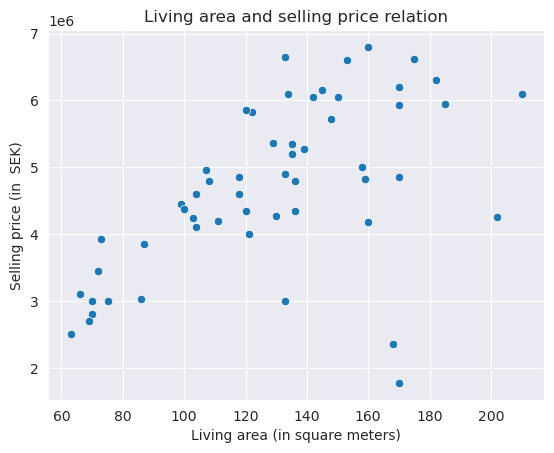

In [8]:
make_scatter_plot(
    regression_hemnet_df['Living_area'], 
    regression_hemnet_df['Selling_price'],
    'Living area and selling price relation',
    'Living area (in square meters)',
    'Selling price (in  SEK)'
)

After seeing the data distribution in the scatter plot, we built the linear regression model using the `LinearRegression` object from the `scikit-learn` package.

In [9]:
lr_model = LinearRegression().fit(
    regression_hemnet_df['Living_area'].values.reshape(-1, 1),
    regression_hemnet_df['Selling_price'].values
)

Lastly, we save in separate variables the true value of the target (that is, the **Selling_price** column) and the predicted value of our model. They will be used in later questions.

In [10]:
true_target_values = regression_hemnet_df['Selling_price']
predicted_target_values = lr_model.predict(regression_hemnet_df['Living_area'].values.reshape(-1,1))

### 2. What are the values of the slope and intercept of the regression line?

After the training computation, the model returned a set of results: they consist of multiple slopes of the regression line and its intercept. Those values will be taken from the LinearRegression object attributes `lr_model.coef_[0]` and `lr_model.intercept_`.

In [11]:
print(f'Slope of the regression line: {lr_model.coef_[0]}')
print(f'Intercept of the regression line: {lr_model.intercept_}')

Slope of the regression line: 19370.138547331582
Intercept of the regression line: 2220603.2433558684


Since the model we used is a linear regression model applied on two dimensional data, we obtained a single slope and an intercept . In order to visualize the resulting regression line, we defined 2 auxiliary functions as below:

In [12]:
def linear_function(x, m, b):
    return m * x + b

def y_line(x_line, m, b):
    return [linear_function(x, m, b) for x in x_line]

Now we can draw the scatter plot with the resulting regression line.

<Axes: title={'center': 'Living area and selling price relation'}, xlabel='Living area (in square meters)', ylabel='Selling price (in  SEK)'>

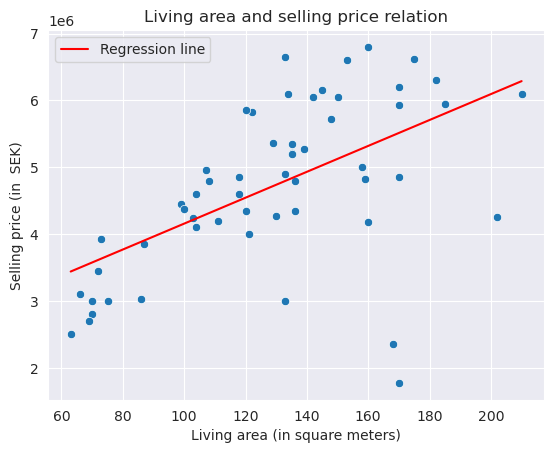

In [13]:
make_scatter_plot(
    regression_hemnet_df['Living_area'], 
    regression_hemnet_df['Selling_price'],
    'Living area and selling price relation',
    'Living area (in square meters)',
    'Selling price (in  SEK)'
)

# create the regression line
sns.lineplot(
    x=regression_hemnet_df['Living_area'], 
    y=y_line(regression_hemnet_df['Living_area'], lr_model.coef_[0], lr_model.intercept_), 
    label=f'Regression line', 
    color='red'
)

### 3. Use this model to predict the selling prices of houses which have living area 100 m^2, 150 m^2, and 200 m^2.

To answer the question, we used the `.predict()` method of the trained Linear Regression model. This way, we obtained predictions about the selling prices, for each requested living area. 

In [14]:
print(f'The predicted price for 100 m^2 is: {round(lr_model.predict(np.array([[100]]))[0], 2)} m^2')
print(f'The predicted price for 150 m^2 is: {round(lr_model.predict(np.array([[150]]))[0], 2)} m^2')
print(f'The predicted price for 200 m^2 is: {round(lr_model.predict(np.array([[200]]))[0], 2)} m^2')

The predicted price for 100 m^2 is: 4157617.1 m^2
The predicted price for 150 m^2 is: 5126124.03 m^2
The predicted price for 200 m^2 is: 6094630.95 m^2


### 4. Draw a residual plot. Discuss some potential strategies for improving the model.

At this point of the analysis, we will draw the residual plot related to the prediction of our linear regression model. The plot will be used to perform the the Linear Regression model checking (in other words, to see how good the model was at the predictions). 

Before drawing the plot, we standardize the residual points to have a better interpretation of the values.

In [15]:
# function to compute the residual
def residuals(y_actual, y_predicted):
    return np.array(y_actual - y_predicted)

In [16]:
standardized_residuals = StandardScaler().fit_transform(
    residuals(
        y_actual=true_target_values, 
        y_predicted=predicted_target_values
    ).reshape(-1, 1)
)

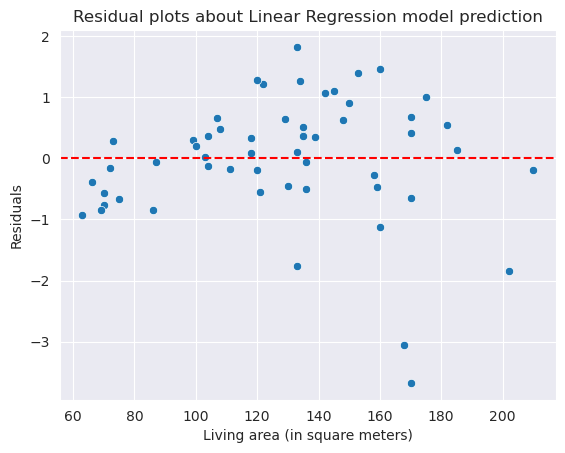

In [17]:
make_scatter_plot(
    regression_hemnet_df['Living_area'],
    standardized_residuals.flatten(),
    'Residual plots about Linear Regression model prediction',
    'Living area (in square meters)',
    'Residuals'
)
plt.axhline(y=0,color='red',linestyle='--')
plt.show()

There are 2 aspects that we can look for to make sure that we got a good residual plot:

- having as many points as possible close to the red line (that is, the closer a point is to zero, the lower the residual value).
- having a symmetrical distribution of the points around zero, since it would indicate that the linear relationship between the feature and the target variable is appropriate.

Lastly, we compute the `Mean Squared Error` (MSE) to have a first baseline for both evaluation and comparison with other versions of the model, for future possible impovements. A more specific reason for using MSE as model evaluation metric is its sensitivity to outliers.    

In [18]:
# compute the mse of the first model
mse = mean_squared_error(true_target_values, predicted_target_values)
print(mse)

1035109372310.1244


#### Possible developments to further improve the model

There are several ways and techniques to improve a linear regression model. Also related to the result obtained by our model and the residual plot, there could be several strategies to improve the linear regression:
- **checking for outliers in the dataset**. We can take advatage of the the already trained model and remove the datapoints that have the higher squared residuals.
- since our case is a simple linear regression, **we can add more higher-order variables to add new features**. In other words, starting from the columns that we already have, we can apply feature engineering techniques to try better fit our datapoints.
- another useful strategy can also be **adding novel information to our model, using for example the other features of the Hemnet dataset for training**. In adding new features It's important to check their correlation: having highly correlated features means that they say the same thing for the selling price prediction, so they are redundant.
To prove one of the possible improvements of the model, in the next section we will show an implementation of the outliers removal strategy.   

#### Model improvement removing outliers

To first identify which data points are outliers we used `squared residuals` strategy, with the prediction from the first trained linear regression model. This method has 2 main advanteges:
- even if the distance from the average line to the data point is negative, after squaring it we can just deal with positive quantities, which makes it easier for comparisons.
- squaring the distance between the real value and the predicted one highlights the furthest points. These are the outliers we want to remove.

Usually, when removing outliers from a dataset it is common to remove data points with squared residuals above the 75th percentile. However, the data size of this task is too small to do so. Since there are only 56 data points, if 25% of them were removed, the model could underfit our data and it would not reflect a real situation. Therefore, we will only drop the 10% of the dataset with the highest squared residuals.

In [19]:
# removing outliers, by using the squared residuals and removing the biggest 10%
initial_datapoints = regression_hemnet_df.shape[0]
squared_residuals = np.square(true_target_values - predicted_target_values)

df = pd.concat(
    [regression_hemnet_df, pd.DataFrame({'squared_residual': squared_residuals})], axis=1
).sort_values(by='squared_residual')

# now we drop the 10% of the datapoints with the highest squared residusals -> outliers
df_no_outliers = df.head(int(len(df) * 0.9)).drop('squared_residual', axis=1)

print(f'{initial_datapoints - df_no_outliers.shape[0]} outliers dropped')

6 outliers dropped


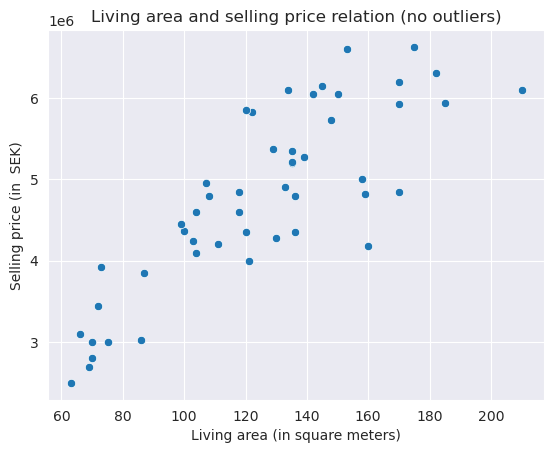

In [20]:
# scatterplot without the outliers
make_scatter_plot(
    df_no_outliers['Living_area'], 
    df_no_outliers['Selling_price'],
    'Living area and selling price relation (no outliers)',
    'Living area (in square meters)',
    'Selling price (in  SEK)'
)

In [21]:
# try a new linear regression model and compare to the initial one
lr_model_no_outliers = LinearRegression().fit(
    df_no_outliers['Living_area'].values.reshape(-1, 1),
    df_no_outliers['Selling_price']
)

In [22]:
true_target_values_no_outliers = df_no_outliers['Selling_price']
predicted_target_values_no_outliers = lr_model_no_outliers.predict(
    df_no_outliers['Living_area'].values.reshape(-1, 1)
)

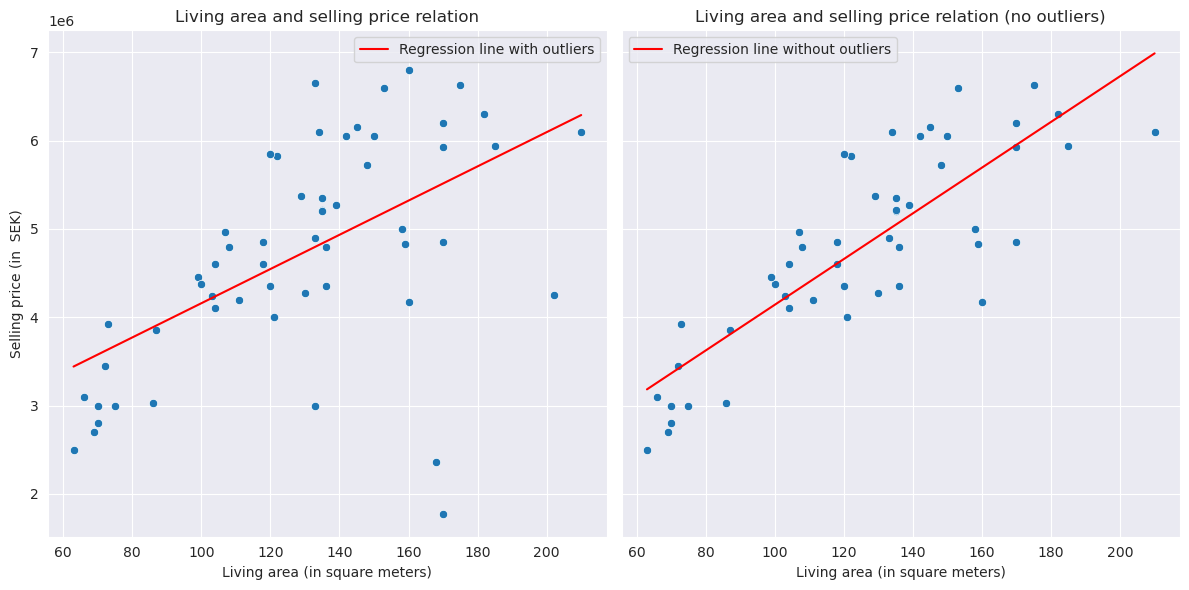

In [23]:
# comparison plots
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)

# plot for the regression model with outliers
make_scatter_plot(
    regression_hemnet_df['Living_area'], 
    regression_hemnet_df['Selling_price'],
    'Living area and selling price relation',
    'Living area (in square meters)',
    'Selling price (in  SEK)',
    ax1
)
sns.lineplot(
    x=regression_hemnet_df['Living_area'], 
    y=y_line(regression_hemnet_df['Living_area'], lr_model.coef_[0], lr_model.intercept_), 
    label=f'Regression line with outliers', 
    color='red',
    ax=ax1
)

# plot for the regression model without outliers
make_scatter_plot(
    df_no_outliers['Living_area'], 
    df_no_outliers['Selling_price'],
    'Living area and selling price relation (no outliers)',
    'Living area (in square meters)',
    'Selling price (in  SEK)',
    ax2
)
sns.lineplot(
    x=df_no_outliers['Living_area'], 
    y=y_line(df_no_outliers['Living_area'], lr_model_no_outliers.coef_[0], lr_model_no_outliers.intercept_), 
    label=f'Regression line without outliers', 
    color='red',
    ax=ax2
)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

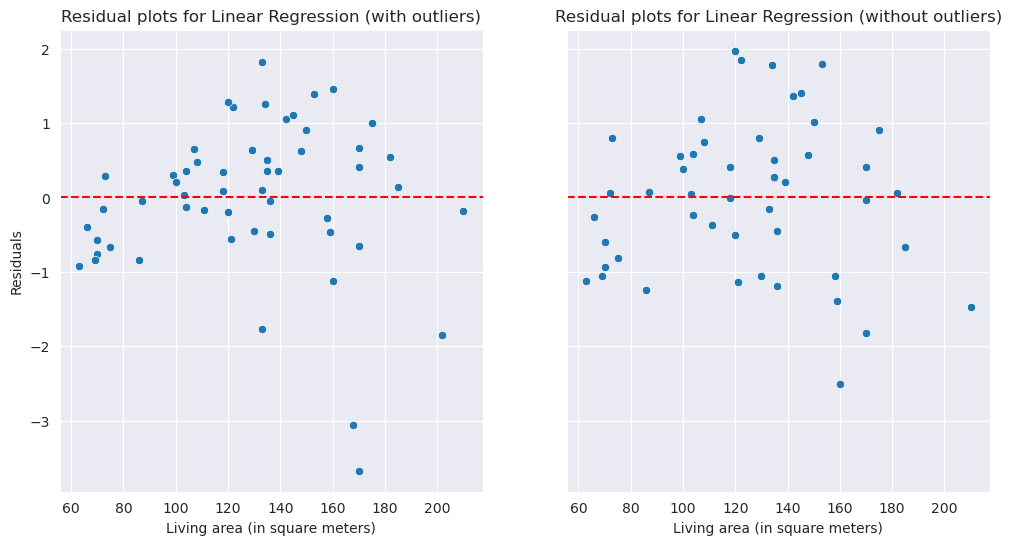

In [24]:
# comparison also for the residual plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)

make_scatter_plot(
    regression_hemnet_df['Living_area'],
    standardized_residuals.flatten(),
    'Residual plots for Linear Regression (with outliers)',
    'Living area (in square meters)',
    'Residuals',
    ax1
)
ax1.axhline(y=0,color='red',linestyle='--')

standardized_residuals_no_outliers = StandardScaler().fit_transform(
    np.array(true_target_values_no_outliers - predicted_target_values_no_outliers).reshape(-1, 1)
).flatten()
make_scatter_plot(
    df_no_outliers['Living_area'],
    standardized_residuals_no_outliers,
    'Residual plots for Linear Regression (without outliers)',
    'Living area (in square meters)',
    'Residuals',
    ax2
)
ax2.axhline(y=0,color='red',linestyle='--')

plt.show()

As we can see in the residual plots, the one without outliers has more residual points close to the origin (that is, lower residual values) and they tend to form a symmetrical patterns in respect to the red line.
As a definitive sign of improvement, we finally print the Mean Squared Error of both the first model and the improved one without outliers for comparison, showing how much the error measure drops.

In [25]:
# check the MSE of both the model
print(f'MSE score with outlier: {mean_squared_error(true_target_values, predicted_target_values)}')
print(f'MSE score without outlier: {mean_squared_error(true_target_values_no_outliers, predicted_target_values_no_outliers)}')
print(f'MSE lowers by {mean_squared_error(true_target_values, predicted_target_values) - mean_squared_error(true_target_values_no_outliers, predicted_target_values_no_outliers)}')

MSE score with outlier: 1035109372310.1244
MSE score without outlier: 365407811611.33545
MSE lowers by 669701560698.789


## Part 2: Classification

The goal of the task is building machine learning models for `classification`, so they can be then used to predict a specific label (among a number of categories) for an input data point based on its features. 2 different models will be used: 
- **logistic regression**, a type of regression analysis that models the probability of a binary outcome using the sigmoid function.
- **k-Nearest Neighbour**: an algorithm that relies on the idea of proximity or similarity between data points, where `k` is the parameter which tells us how many "neighbour" points we have to consider to classify a specific example. In particular, we will take into account 2 different versions of the model: in the first one we will consider all the distance between points uniformly, while in the other we will give a weight to each distance to perfom the classification.
At the end, after training and evaluating the models using the proper tools (confusion matrices and classification reports) and the right measurement (accuracy), we will compare them and highlitght their strengths.

### Import Dataset

For our classification purposes and answering the questions, we used the popular iris dataset, consisting in several measurements from three different species of iris flowers:
- `sepal length` (cm)
- `sepal width` (cm)
- `petal length` (cm)
- `petal width` (cm)
We also have the the feature `species`, which will be the target categorical variable for our tasks.

In [26]:
from sklearn.datasets import load_iris

In [27]:
# loading the dataset 
iris = load_iris()

# Create a Pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# add the target column to the dataframe
iris_df['species'] = iris.target

In [28]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 1. Use a confusion matrix to evaluate the use of logistic regression to classify the Iris data set.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#### Split the data into training and testing set

In order to create our model, we will split the data in 2 sets:
- **Training set**: The percentage of the original set that is going to be used to train the model.
- **Test set**: The percentage of the original set that will be used to validate the model performance.





In [31]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#### Build the Logistic Regression Model

In [32]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

#### Predict the values for the testing set

In [33]:
y_pred = logreg.predict(X_test)

#### Evaluate the model using a confusion matrix

In [34]:
confMat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confMat)

Confusion Matrix:
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


By analyzing the confusion matrix we can tell the number of correct and wrong predictions.
The rows of a confusion matrix correspond to the predicted classes and the columns to the real ones.
The main diagonal of a confusion matrix represents the correct predictions. In other words, and in this case, it means that model predicted a flower to belong to a certain class, and it did in fact belong to that specific class.
The obtained logistic regression model predicted correctly the class of `29` flowers and only missed one, revealed by the second row and third column of the matrix.

### 2. Use k-nearest neighbors to classify the Iris data set with some different values for k, and with uniform and distance-based weights. What will happen when k grows larger for the different cases? Why?

#### Import Libraries

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#### Standardize the features

We will standardize the features as a method of data preprocessing. This is done to make sure that all the features are on the same scale, which can help the model learn more efficiently.

The notion of "closeness" or "distance" between data points plays a crucial role in the kNN algorithm as it uses distance metrics to find the k nearest neighbors. Depending on their scale, features may have a smaller/larger influence on the distance between points. By standardizing the features, all of them will contribute the same to the distance measure, lowering the chances of finding the wrong k nearest neighbors.

In [36]:
#Initialize the scaler
scaler = StandardScaler()

#Fit the scaler on the training data
scaler.fit(X_train)

#Transform the training and testing data
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)

#### Build and train the kNN models for different k values. Predict the results for each model and save them

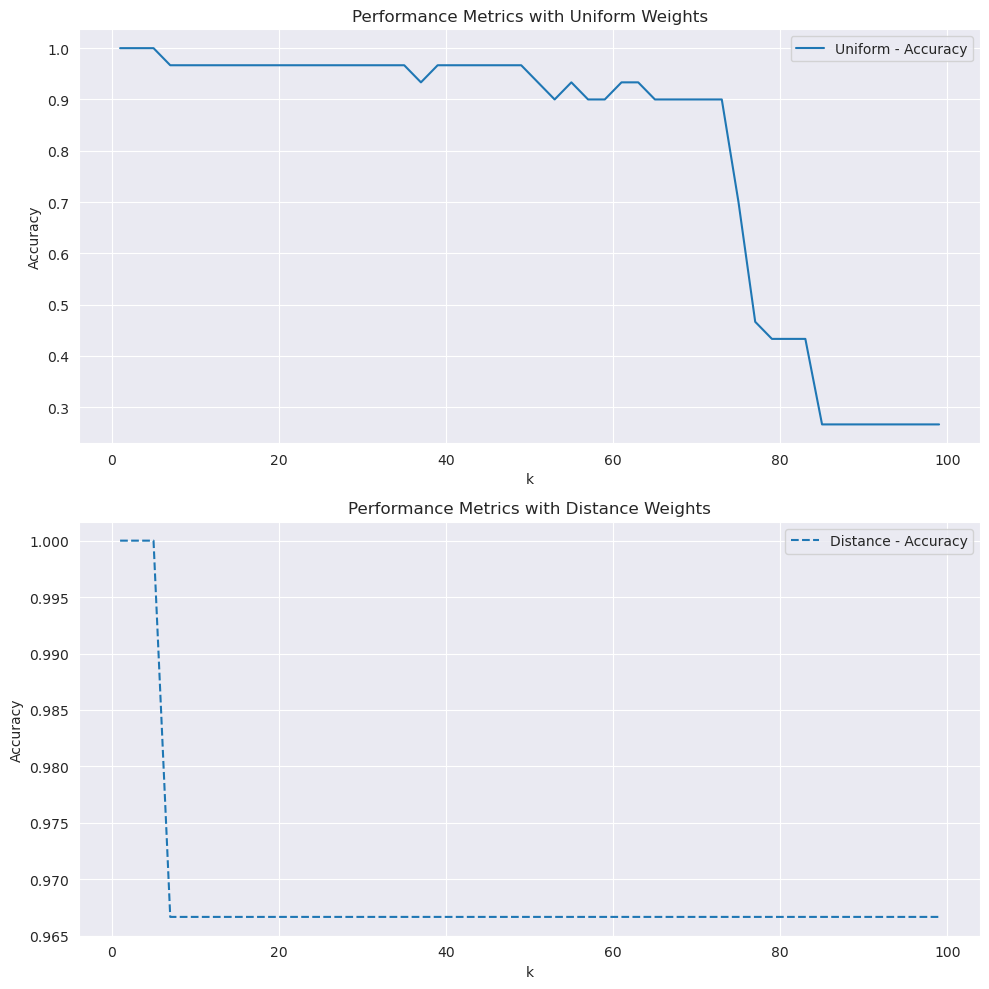

In [37]:
k_values = np.arange(1, 100, 2)
metrics_uniform = []
metrics_distance = []
for k in k_values:
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_weighted = KNeighborsClassifier(n_neighbors=k, weights='distance')

    knn_uniform.fit(X_train, y_train)
    knn_weighted.fit(X_train, y_train)

    y_pred_uniform = knn_uniform.predict(X_test)
    y_pred_distance = knn_weighted.predict(X_test)

    metrics_uniform.append(accuracy_score(y_test, y_pred_uniform))

    metrics_distance.append(accuracy_score(y_test, y_pred_distance))

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].plot(k_values, metrics_uniform, label=f'Uniform - Accuracy')

axs[0].set_xlabel('k')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Performance Metrics with Uniform Weights')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(k_values, metrics_distance, label=f'Distance - Accuracy', linestyle='--')

axs[1].set_xlabel('k')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Performance Metrics with Distance Weights')
axs[1].legend()
axs[1].grid(True)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Show the plot
plt.show()

For this question we used different `k` values, from `1` to `100` in steps of `2`. For each `k` value we trained and tested 2 models:

- Uniform KNN: selects the k nearest neighbors of the point, not taking into account their distance to it. All of the k neighbors contribute equally to the prediction, despite being at different distances.

- Distance-Based KNN: selects the k nearest neighbors  of the point, taking into account their distance to it. The k neighbors contribute differently to the prediction depending on how close they are to the point. The closer they are, the more they contribute.

The higher the `k` value, the more points are taken into consideration. This means that more distant points, that potentially belong to different classes, are considered in the prediction, thus decreasing the accuracy of both models. In other words, taking into account too many "neighbor" points would imply data underfitting.

Now we will go into detail about the differences between the 2 types of models.

 In the uniform one, there is an enormous decrease on the accuracy whereas for the distance based one, despite decreasing, it is nowhere as meaningful as the first. One explanation for this could be:

- As mentioned above, increasing the value of k means considering more distant points. When using the uniform kNN, all points will contribute the same way for the prediction, meaning that points that are further away will count just as much as the closest ones. Points that belong to different classes will affect the prediction in the same way.

- On the other hand, the distance-based kNN takes the distance of the points into account, meaning that the further away a point is, the less it will contribute for the prediction. This will attenuate the effects of the continuous increase of the k value as the contribution of the distant points will tend to 0. Points that belong to different classes will not affect the prediction in the same way.

To conclude, a better accuracy is obtained with the distance based kNN which means that, for this case, taking into account the distance between points is relevant, therefore the closer the points are, the more likely they are to belong to the same class.

### 3. Compare the classification models for the Iris data set that are generated by k-nearest neighbors (for the different settings from question 2) and by logistic regression. Calculate confusion matrices for these models and discuss the performance of the various models.

For this question we chose the value `k = 56` (by visualization of the above plots). This value presents differences between both of the kNN models. As shown by the plots, the distance based kNN ends up having a higher accuracy than the uniform one, which was explained in the previous question.
We will use that `k` value to train the related kNN models (both with uniform and weighted distances) and make a comparison by visualizing the confusion matrices and showing the classification reports for both the kNN models and the logistic regression one.

In [38]:
knn_uniform = KNeighborsClassifier(n_neighbors=56, weights='uniform')
knn_weighted = KNeighborsClassifier(n_neighbors=56, weights='distance')

knn_uniform.fit(X_train, y_train)
knn_weighted.fit(X_train, y_train)

y_pred_uniform = knn_uniform.predict(X_test)
y_pred_distance = knn_weighted.predict(X_test)

knn_confMat_uniform = confusion_matrix(y_test, y_pred_uniform)
knn_confMat_weighted = confusion_matrix(y_test, y_pred_distance)
print("Confusion Matrix - Logistic Regression:")
print(confMat)
print("Confusion Matrix - Uniform kNN (k = 56):")
print(knn_confMat_uniform)
print("Confusion Matrix - Weighted kNN (k = 56):")
print(knn_confMat_weighted)

Confusion Matrix - Logistic Regression:
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
Confusion Matrix - Uniform kNN (k = 56):
[[14  0  0]
 [ 0  7  1]
 [ 0  2  6]]
Confusion Matrix - Weighted kNN (k = 56):
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


In [39]:
from sklearn.metrics import classification_report

# Generate the classification report for each model to compare
report_knn_uniform = classification_report(y_test, y_pred_uniform)
report_knn_weighted = classification_report(y_test, y_pred_distance)
report_logistic = classification_report(y_test, y_pred)

# Print the report
print('Classification report for the Logistic Regression model: ')
print(report_logistic)
print('Classification report for the KNN model (uniform distance): ')
print(report_knn_uniform)
print('Classification report for KNN model (weighted distance): ')
print(report_knn_weighted)

Classification report for the Logistic Regression model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

Classification report for the KNN model (uniform distance): 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.78      0.88      0.82         8
           2       0.86      0.75      0.80         8

    accuracy                           0.90        30
   macro avg       0.88      0.88      0.87        30
weighted avg       0.90      0.90      0.90        30

Classification report for KNN model (weighted distance): 
              precision    recall  f1-score   support

      

For the presented dataset, the results obtained by the confusion matrices and the metrics in the classsfication reports show that the distance based kNN does just as good as the logistic regression one. Both of them outperform the uniform kNN. To conclude, we briefly discuss the scenario where the 2 types of models perform the best.

- **Logistic Regression**: Works well when there is a linear decision boundary separating the classes. It also works better with large datasets, as it can handle them more efficiently than kNN (especially during the prediction phase).

- **kNN**: Works well when there is a non-linear decision boundary and the dataset is small to moderate, as it can be computationally expensive with large datasets.

In this scenario, both logistic regression and kNN have the potential to work well due to the well-defined features and balanced classes, with logistic regression capturing linear relationships and kNN leveraging the proximity of similar flowers to make predictions. Through appropriate preprocessing and parameter tuning, both models can achieve high predictive accuracy.